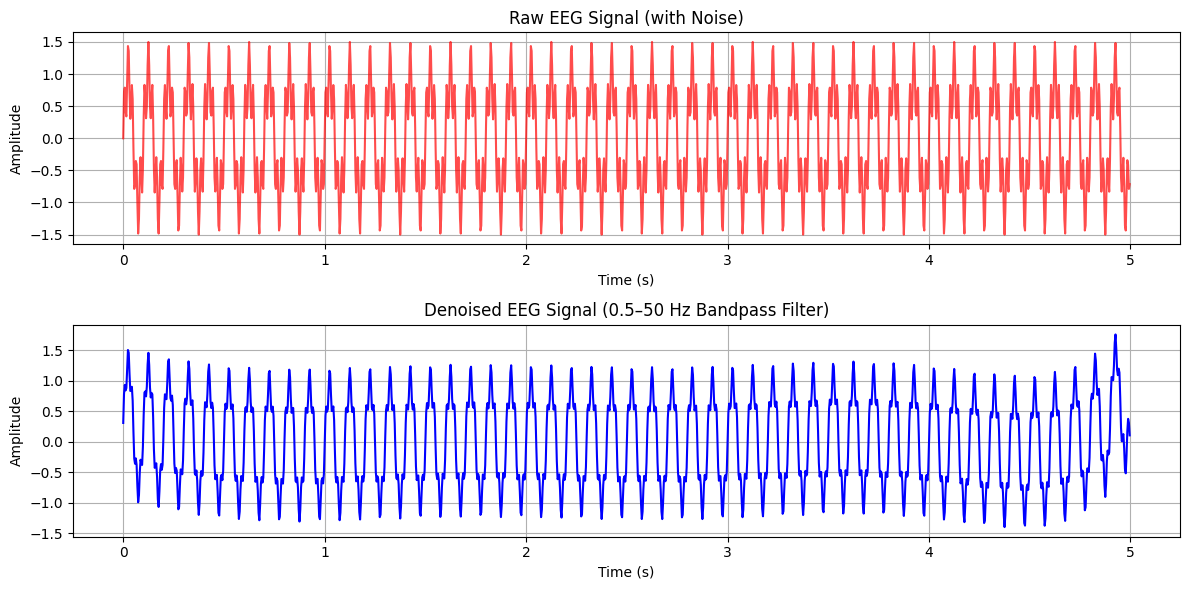

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# ✅ Simulated EEG Signal (Replace with Your Data)
fs = 256  # Sampling frequency (Hz)
t = np.arange(0, 5, 1/fs)  # 5-second signal
eeg_signal = np.sin(2*np.pi*10*t) + 0.5*np.sin(2*np.pi*50*t)  # 10 Hz + 50 Hz (simulated noise)

# 🎯 1️⃣ Bandpass Filter (0.5–50 Hz) to Remove Noise
def bandpass_filter(data, lowcut=0.5, highcut=50, fs=256, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

# Apply the filter
filtered_eeg = bandpass_filter(eeg_signal)

# 🎯 2️⃣ Plot Raw and Denoised EEG Signals
plt.figure(figsize=(12, 6))

# Raw EEG
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, color='red', alpha=0.7)
plt.title("Raw EEG Signal (with Noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Filtered EEG
plt.subplot(2, 1, 2)
plt.plot(t, filtered_eeg, color='blue')
plt.title("Denoised EEG Signal (0.5–50 Hz Bandpass Filter)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


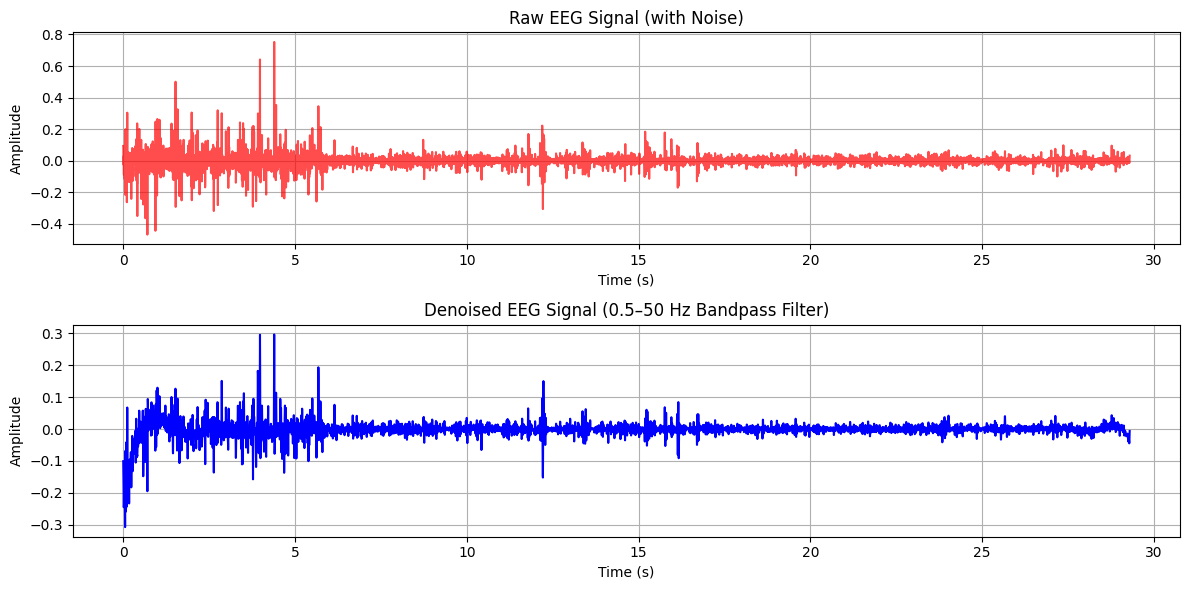

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal

# ✅ 1️⃣ Load Your EEG Data
file_path = "C:/Users/dhars/jupiters/DFeatures.xlsx"  # Update with your file path
df = pd.read_excel(file_path)

# 🎯 Select a specific EEG channel (Modify based on your dataset)
eeg_signal = df.iloc[:, 0].values  # Assuming the first column is EEG signal
fs = 256  # Sampling frequency (Hz)
t = np.linspace(0, len(eeg_signal)/fs, len(eeg_signal))  # Create time axis

# ✅ 2️⃣ Bandpass Filter (0.5–50 Hz)
def bandpass_filter(data, lowcut=0.5, highcut=50, fs=256, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

# Apply filter
filtered_eeg = bandpass_filter(eeg_signal)

# ✅ 3️⃣ Plot Raw and Filtered EEG Signal
plt.figure(figsize=(12, 6))

# 🎯 Raw EEG
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, color='red', alpha=0.7)
plt.title("Raw EEG Signal (with Noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# 🎯 Filtered EEG
plt.subplot(2, 1, 2)
plt.plot(t, filtered_eeg, color='blue')
plt.title("Denoised EEG Signal (0.5–50 Hz Bandpass Filter)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


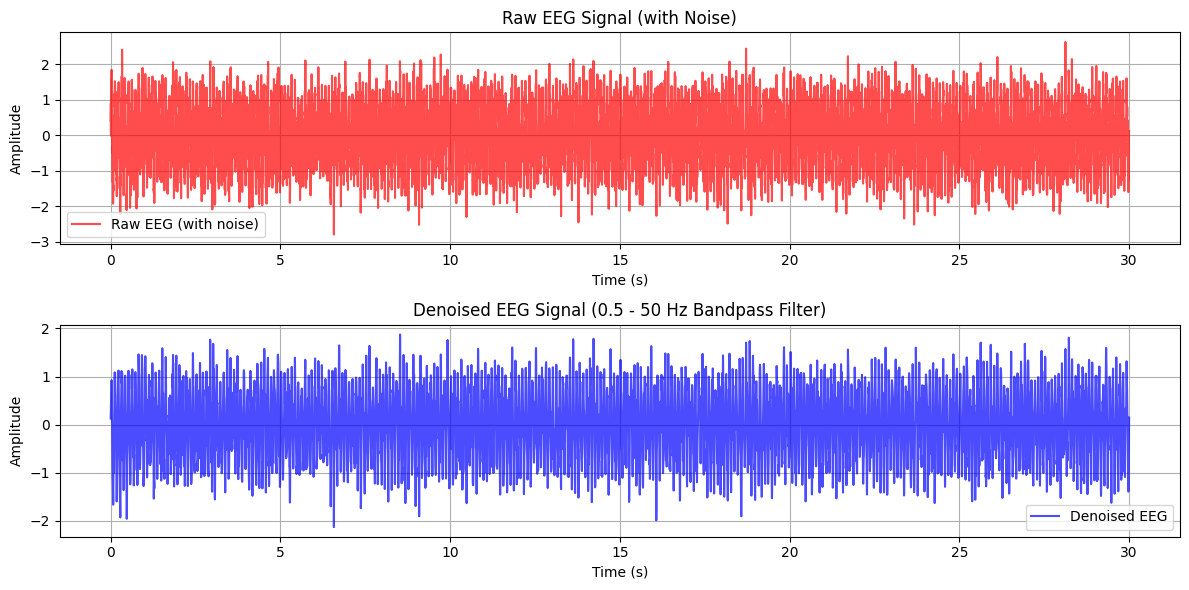

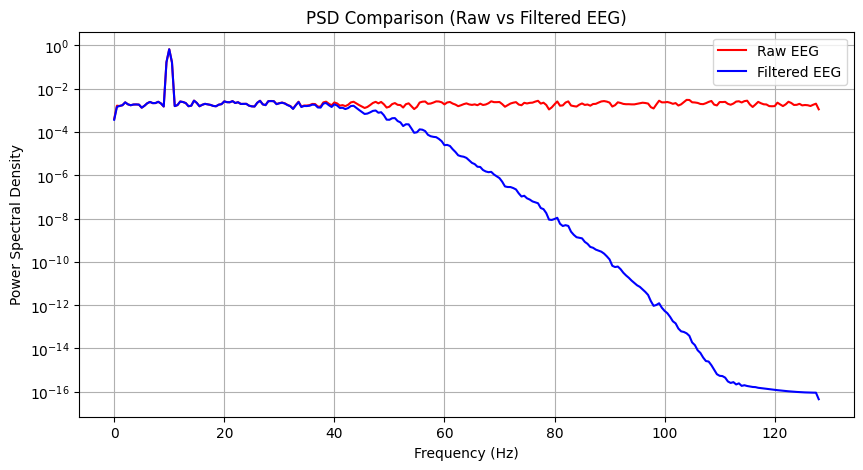

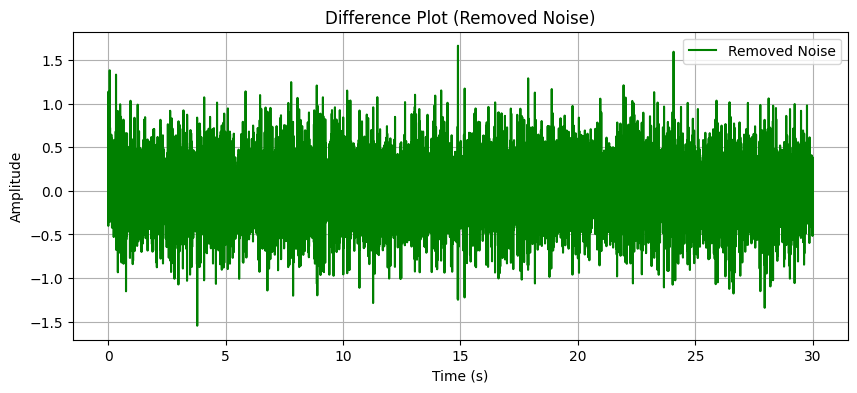

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch

# Function to create a bandpass filter (0.5 - 50 Hz)
def bandpass_filter(data, lowcut=0.5, highcut=50, fs=256, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Simulated EEG signal with noise
fs = 256  # Sampling frequency in Hz
t = np.linspace(0, 30, fs * 30)  # 30 seconds of data
raw_eeg = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.randn(len(t))  # 10 Hz EEG + noise

# Apply Bandpass Filter
filtered_eeg = bandpass_filter(raw_eeg, lowcut=0.5, highcut=50, fs=fs)

# Compute Power Spectral Density (PSD)
frequencies_raw, psd_raw = welch(raw_eeg, fs=fs, nperseg=512)
frequencies_filtered, psd_filtered = welch(filtered_eeg, fs=fs, nperseg=512)

# Plot the signals (Raw vs Filtered)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, raw_eeg, color='red', alpha=0.7, label='Raw EEG (with noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Raw EEG Signal (with Noise)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_eeg, color='blue', alpha=0.7, label='Denoised EEG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Denoised EEG Signal (0.5 - 50 Hz Bandpass Filter)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Plot the PSD (Power Spectral Density)
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies_raw, psd_raw, color='red', label='Raw EEG')
plt.semilogy(frequencies_filtered, psd_filtered, color='blue', label='Filtered EEG')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD Comparison (Raw vs Filtered EEG)')
plt.legend()
plt.grid()
plt.show()

# Plot the Difference Signal (Raw - Filtered)
plt.figure(figsize=(10, 4))
plt.plot(t, raw_eeg - filtered_eeg, color='green', label='Removed Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Difference Plot (Removed Noise)')
plt.legend()
plt.grid()
plt.show()


       Mean       Std  Kurtosis  Skewness  ApproxEntropy  AlphaPower  \
0  0.093699  2.543853  2.026210 -1.420077       0.559309           0   
1  0.084579  2.600449  1.913259 -1.504017       0.557380           0   
2 -0.023826  2.824829  1.267435 -1.367397       0.528766           0   
3  0.029117  3.010555  0.988310 -1.255024       0.541085           0   
4 -0.064360  3.092709  0.771833 -1.169903       0.541816           0   

   BetaPower  ThetaPower       HFE  HjorthComplexity       RMS       PSD  \
0   3.346418    0.950062  0.293330          1.452016  2.545578  2.751491   
1   2.817012    0.846036  0.249807          1.495553  2.601825  2.565507   
2   2.383303    1.214244  0.256458          1.494568  2.824930  3.008321   
3   3.799330    1.344610  0.290521          1.531202  3.010696  3.642490   
4   4.358169    1.178525  0.267223          1.523207  3.093378  3.689723   

      Hurst  SampleEntropy  Label  
0  0.153961       0.442721      2  
1  0.176614       0.443941      2  
2 

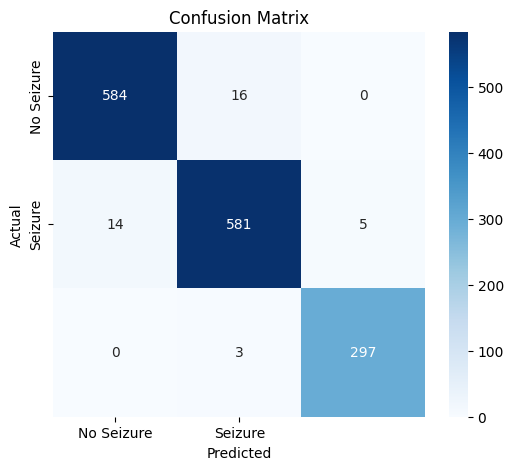

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Step 1: Load Extracted Features
file_path = "C:/Users/dhars/jupiters/EEG_Features.xlsx"
df = pd.read_excel(file_path)

# ✅ Step 2: Check Data
print(df.head())
print(df.shape)

# ✅ Step 3: Separate Features and Labels
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target (seizure vs. non-seizure)

# ✅ Step 4: Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Step 5: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Step 6: Predictions
y_pred = rf_model.predict(X_test)

# ✅ Step 7: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# ✅ Step 8: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Seizure', 'Seizure'], yticklabels=['No Seizure', 'Seizure'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix

# Save the best model
joblib.dump(best_model, "EEG_Seizure_Model.pkl")
print("✅ Model saved successfully!")

# Load and test on new data
loaded_model = joblib.load("EEG_Seizure_Model.pkl")
y_pred = loaded_model.predict(X_test)

# Evaluate Model Performance
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Model saved successfully!
✅ Confusion Matrix:
 [[586  14   0]
 [ 14 580   6]
 [  0   4 296]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       600
           1       0.97      0.97      0.97       600
           2       0.98      0.99      0.98       300

    accuracy                           0.97      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.97      0.97      0.97      1500



✅ Logistic Regression Accuracy: 0.9247
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       583
           1       0.91      0.91      0.91       607
           2       0.95      0.92      0.94       310

    accuracy                           0.92      1500
   macro avg       0.93      0.92      0.93      1500
weighted avg       0.92      0.92      0.92      1500

--------------------------------------------------
✅ Support Vector Machine Accuracy: 0.9320
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       583
           1       0.92      0.92      0.92       607
           2       0.96      0.95      0.95       310

    accuracy                           0.93      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.93      0.93      0.93      1500

--------------------------------------------------
✅ K-Nearest Neighbors Accuracy: 0.9333
              pr

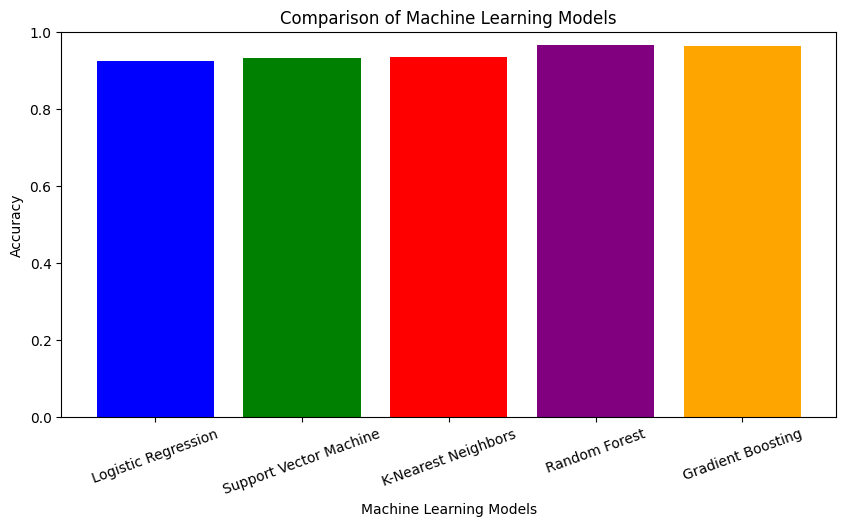

In [ ]:
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Feature Data from Excel
df = pd.read_excel("EEG_Features.xlsx")  # Change this to your actual file path
X = df.drop(columns=["Label"])  # Features
y = df["Label"]  # Target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=132, max_depth=20, min_samples_split=4, min_samples_leaf=1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and Evaluate Each Model
model_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"✅ {name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Plot Model Performance
plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=["blue", "green", "red", "purple", "orange"])
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Machine Learning Models")
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.show()


       Mean       Std  Kurtosis  Skewness  ApproxEntropy  AlphaPower  \
0  0.093699  2.543853  2.026210 -1.420077       0.559309           0   
1  0.084579  2.600449  1.913259 -1.504017       0.557380           0   
2 -0.023826  2.824829  1.267435 -1.367397       0.528766           0   
3  0.029117  3.010555  0.988310 -1.255024       0.541085           0   
4 -0.064360  3.092709  0.771833 -1.169903       0.541816           0   

   BetaPower  ThetaPower       HFE  HjorthComplexity       RMS       PSD  \
0   3.346418    0.950062  0.293330          1.452016  2.545578  2.751491   
1   2.817012    0.846036  0.249807          1.495553  2.601825  2.565507   
2   2.383303    1.214244  0.256458          1.494568  2.824930  3.008321   
3   3.799330    1.344610  0.290521          1.531202  3.010696  3.642490   
4   4.358169    1.178525  0.267223          1.523207  3.093378  3.689723   

      Hurst  SampleEntropy  Label  
0  0.153961       0.442721      2  
1  0.176614       0.443941      2  
2 

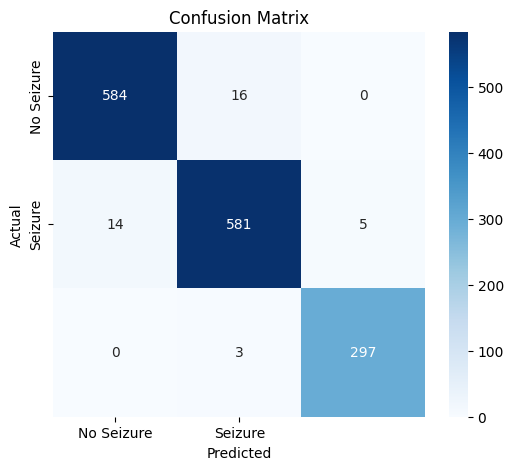

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Step 1: Load Extracted Features
file_path = "C:/Users/dhars/jupiters/EEG_Features.xlsx"
df = pd.read_excel(file_path)

# ✅ Step 2: Check Data
print(df.head())
print(df.shape)

# ✅ Step 3: Separate Features and Labels
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target (seizure vs. non-seizure)

# ✅ Step 4: Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Save X_test and y_test as .npy files
np.save("X_val.npy", X_test.to_numpy())
np.save("y_val.npy", y_test.to_numpy())
print("✅ Saved X_val.npy and y_val.npy")

# ✅ Step 5: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Step 6: Predictions
y_pred = rf_model.predict(X_test)

# ✅ Step 7: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# ✅ Step 8: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Seizure', 'Seizure'], yticklabels=['No Seizure', 'Seizure'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


✅ Model loaded successfully!
✅ Validation data loaded successfully!
🔹 X_val shape: (1500, 14)
🔹 y_val shape: (1500,)
✅ Predictions completed!

✅ Accuracy: 0.97

✅ Confusion Matrix:
 [[586  14   0]
 [ 14 580   6]
 [  0   4 296]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       600
           1       0.97      0.97      0.97       600
           2       0.98      0.99      0.98       300

    accuracy                           0.97      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.97      0.97      0.97      1500



C:\Users\dhars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


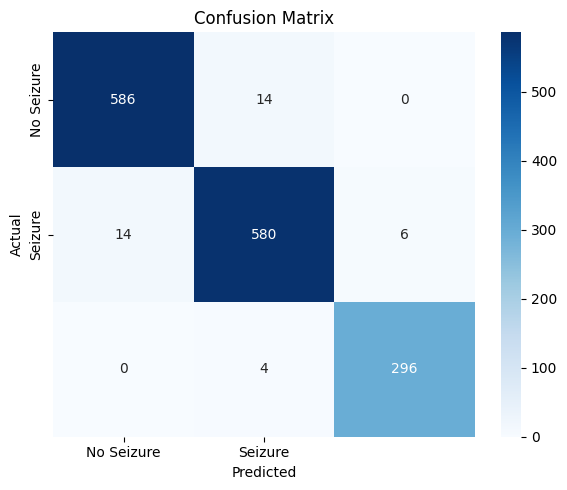

In [ ]:
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Load the trained model
model = joblib.load("EEG_Seizure_Model.pkl")
print("✅ Model loaded successfully!")

# ✅ Step 2: Load validation features and labels
X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")
print("✅ Validation data loaded successfully!")
print(f"🔹 X_val shape: {X_val.shape}")
print(f"🔹 y_val shape: {y_val.shape}")

# ✅ Step 3: Make predictions
y_pred = model.predict(X_val)
print("✅ Predictions completed!")

# ✅ Step 4: Evaluate predictions
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"\n✅ Accuracy: {accuracy:.2f}")
print("\n✅ Confusion Matrix:\n", conf_matrix)
print("\n✅ Classification Report:\n", class_report)

# ✅ Step 5: Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Seizure', 'Seizure'],
            yticklabels=['No Seizure', 'Seizure'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Load the file
y_val = np.load("y_val.npy")

# Set print options for full output
np.set_printoptions(threshold=np.inf)

# Print the entire array
print("🔍 Full contents of y_val.npy:\n", y_val)


🔍 Full contents of y_val.npy:
 [1 0 1 0 0 0 1 0 2 0 2 0 2 0 1 2 0 1 1 1 0 1 2 1 0 1 1 1 1 0 1 0 1 0 0 1 2
 1 1 2 1 0 0 0 0 1 0 1 2 1 0 1 0 0 1 1 1 0 0 0 2 0 1 1 1 0 1 2 0 1 1 1 0 2
 1 2 1 0 2 2 0 0 1 0 0 1 2 1 0 1 2 0 2 2 1 0 1 0 2 1 0 2 1 2 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 0 0 2 0 1 0 1 1 1 1 1 2 0 2 0 0 1 0 2 1 1 0 1 0 2 1 2 0 0
 0 0 2 0 1 1 1 0 0 2 1 1 0 0 0 2 0 0 1 2 0 0 1 1 1 2 1 1 2 1 0 2 0 1 0 0 2
 1 0 0 0 1 1 1 0 0 0 1 0 0 2 0 1 0 2 1 0 0 1 0 2 0 0 0 2 0 1 1 2 0 1 1 1 0
 1 2 1 0 0 0 0 1 0 2 2 0 2 0 1 1 2 2 2 1 2 0 2 1 1 2 0 1 2 1 1 2 0 0 1 1 2
 0 1 0 1 1 1 1 2 0 2 1 1 0 0 2 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 1 0 1 0 1
 0 0 0 0 1 1 0 2 1 0 2 2 1 0 1 2 1 1 2 0 0 0 0 1 2 0 1 2 0 2 1 2 1 0 0 1 0
 0 0 1 1 0 0 2 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 2 2 0 0 0 1 0 0 1 1 0 1 0
 1 0 0 0 2 1 1 1 1 2 0 1 2 2 0 0 1 0 1 1 1 2 1 0 1 0 1 0 0 0 1 1 0 0 0 2 2
 1 1 1 0 2 0 2 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 2 0 0 0 1 1 1 2 1 2 2 1 2
 1 0 1 0 1 2 1 1 1 1 1 1 0 0 1 2 2 1 1 1 0 2 2 0 1 1 0 2 1 1 2 1 0 2 

In [ ]:
import numpy as np
import joblib

# ✅ Step 1: Load the saved model
model = joblib.load("EEG_Seizure_Model.pkl")
print("✅ Model loaded successfully!")

# ✅ Step 2: Load only X_val
X_val = np.load("X_val.npy")
print("✅ X_val loaded successfully!")
print("🔹 X_val shape:", X_val.shape)

# ✅ Step 3: Predict labels
y_pred = model.predict(X_val)
print("✅ Prediction completed!")

# ✅ Step 4: Ensure full array gets printed
np.set_printoptions(threshold=np.inf)

# ✅ Step 5: Print all predicted labels
print("\n🔹 Predicted Labels (y_val):\n", y_pred)


✅ Model loaded successfully!
✅ X_val loaded successfully!
🔹 X_val shape: (1500, 14)
✅ Prediction completed!

🔹 Predicted Labels (y_val):
 [1 0 1 0 0 0 1 0 2 0 2 0 2 0 1 2 0 1 1 1 0 1 2 1 0 1 1 1 1 0 1 0 1 0 0 1 2
 1 1 2 1 0 0 0 0 1 0 2 2 1 0 1 0 0 1 1 1 0 0 0 2 0 1 1 1 0 1 2 0 1 1 1 0 2
 1 2 1 0 2 2 0 0 1 0 0 1 2 1 0 1 2 0 2 2 1 0 1 0 2 1 0 2 1 2 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 0 0 2 0 1 0 1 1 1 1 1 2 0 2 0 1 0 0 2 1 1 0 1 0 2 1 2 0 0
 0 0 2 1 1 1 1 0 0 2 1 1 0 0 0 2 0 0 1 2 0 0 1 1 1 2 1 1 2 1 0 2 0 1 0 0 2
 1 0 0 0 1 1 1 0 0 0 1 0 0 2 0 1 0 2 2 0 0 1 0 2 0 0 0 2 0 1 1 2 0 1 1 1 0
 1 2 1 0 0 0 0 1 0 2 2 0 2 0 1 1 2 2 1 1 2 0 2 1 1 2 0 1 2 1 1 2 0 0 1 1 2
 0 1 0 1 1 1 1 2 0 2 1 1 0 0 2 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 2 1 0 1 0 1
 0 0 1 0 1 1 0 2 1 0 2 2 0 0 1 2 1 1 2 0 0 0 0 1 2 0 1 2 0 2 0 2 1 0 0 1 0
 0 0 1 1 0 0 2 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 2 2 0 0 0 1 0 0 1 1 0 1 0
 0 0 0 0 2 1 1 1 1 2 0 1 2 2 0 0 1 0 0 1 1 2 1 0 1 0 1 0 0 0 1 1 0 0 0 2 2
 1 1 1 0 2 0 2 0 0 1 0 1 1 0 0 1 0 0 

C:\Users\dhars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import joblib
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Load the saved model
model = joblib.load("EEG_Seizure_Model.pkl")
print("✅ Model loaded successfully!")

# ✅ Load validation features
X_val = np.load("X_val.npy")
print("✅ X_val loaded. Shape:", X_val.shape)

# ✅ Load actual labels for validation set
y_val = np.load("y_val.npy")
print("✅ y_val loaded. Shape:", y_val.shape)

# ✅ Make predictions
y_pred = model.predict(X_val)
print("✅ Predictions completed!")

# ✅ Print all predicted and actual labels
np.set_printoptions(threshold=np.inf)
print("\n🔹 Predicted Labels (y_pred):\n", y_pred)
print("\n🔹 Actual Labels (y_val):\n", y_val)

# ✅ Compare using Confusion Matrix and Classification Report
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_val, y_pred))


✅ Model loaded successfully!
✅ X_val loaded. Shape: (1500, 14)
✅ y_val loaded. Shape: (1500,)
✅ Predictions completed!

🔹 Predicted Labels (y_pred):
 [1 0 1 0 0 0 1 0 2 0 2 0 2 0 1 2 0 1 1 1 0 1 2 1 0 1 1 1 1 0 1 0 1 0 0 1 2
 1 1 2 1 0 0 0 0 1 0 2 2 1 0 1 0 0 1 1 1 0 0 0 2 0 1 1 1 0 1 2 0 1 1 1 0 2
 1 2 1 0 2 2 0 0 1 0 0 1 2 1 0 1 2 0 2 2 1 0 1 0 2 1 0 2 1 2 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 0 0 2 0 1 0 1 1 1 1 1 2 0 2 0 1 0 0 2 1 1 0 1 0 2 1 2 0 0
 0 0 2 1 1 1 1 0 0 2 1 1 0 0 0 2 0 0 1 2 0 0 1 1 1 2 1 1 2 1 0 2 0 1 0 0 2
 1 0 0 0 1 1 1 0 0 0 1 0 0 2 0 1 0 2 2 0 0 1 0 2 0 0 0 2 0 1 1 2 0 1 1 1 0
 1 2 1 0 0 0 0 1 0 2 2 0 2 0 1 1 2 2 1 1 2 0 2 1 1 2 0 1 2 1 1 2 0 0 1 1 2
 0 1 0 1 1 1 1 2 0 2 1 1 0 0 2 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 2 1 0 1 0 1
 0 0 1 0 1 1 0 2 1 0 2 2 0 0 1 2 1 1 2 0 0 0 0 1 2 0 1 2 0 2 0 2 1 0 0 1 0
 0 0 1 1 0 0 2 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 2 2 0 0 0 1 0 0 1 1 0 1 0
 0 0 0 0 2 1 1 1 1 2 0 1 2 2 0 0 1 0 0 1 1 2 1 0 1 0 1 0 0 0 1 1 0 0 0 2 2
 1 1 1 0 2 0 2 0 0 1 0 1 

C:\Users\dhars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
